## Data used for understanding recycling better

In [1]:
# install all libraries
#!python -m pip install --upgrade pip
#!pip install xlrd

In [2]:
# import all libraries

import pandas as pd
from pandas import read_csv
import os
import matplotlib.pyplot as plt

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/arminberger/Desktop/Semester 1. 2022/FIT5120-Industry Experience/onboarding project/wrangling_code'

We read in all relevant sheets. A lot of pre-processing was already done in Excel.

In [4]:
all_trash_overtime_df = pd.read_excel(current_dir + '/open_data/recycling_data_extracted.xlsx' \
                                 , sheet_name = 'all_trash_overtime', header = 1)

In [5]:
all_trash_overtime_df.rename(columns={'Reference year':'Year'}, inplace=True)

In [6]:
all_trash_overtime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      19 non-null     object 
 1   Garbage                   19 non-null     float64
 2   Recyclables               19 non-null     float64
 3   Organics                  19 non-null     float64
 4   Total                     19 non-null     float64
 5   Garbage_percent           19 non-null     float64
 6   Recyclables_percent       19 non-null     float64
 7   Organics_percent          19 non-null     float64
 8   Total_percent             19 non-null     int64  
 9   Contaminated_recycling    19 non-null     float64
 10  Uncontaminated_recycling  19 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.8+ KB


In [7]:
def clean_string(text):
    
    text = text.lower()
    
    text = text.strip()
    
    return text
    

In [8]:
trash_content_df = pd.read_excel(current_dir + '/open_data/recycling_data_extracted.xlsx' \
                                 , sheet_name = 'types_trash', header = 1)

In [9]:
garbage_ok = trash_content_df['rub_ok'][0].replace(';',',').split(', ')
garbage_ok = [clean_string(x) for x in garbage_ok]
garbage_ok

['general rubbish',
 'nappies (wrapped)',
 'meat/bones',
 'food scraps (also visit home composting)',
 'non-recyclable plastics such as plastic bags',
 'expanded polystyrene foam used in take-away coffee cups or packaging for electrical goods',
 'plastic cling-film',
 'plastic toys',
 'cds',
 'dvds',
 'vcr tapes',
 'broken ceramics',
 'crockery',
 'pyrex',
 'drinking glasses',
 'mirrors or window glass (wrapped) and light globes',
 'soft plastic that you can bend or scrunch (like plastic from a biscuit tray or cling wrap)']

In [10]:
garbage_notok = trash_content_df['rub_notok'][0].replace(';',',').split(', ')
garbage_notok = [clean_string(x) for x in garbage_notok]
garbage_notok

['hot liquid or ashes',
 'oil',
 'chemicals',
 'pain+c3ts and solvents (visit chemical waste disposal)',
 'corrosive and flammable items (visit chemical waste disposal)',
 'syringes (visit needle and syringe disposal)',
 'car parts (visit waste and recycling centre)',
 'soil',
 'timber',
 'bricks or other building materials (visit waste and recycling centre)',
 'unwrapped vacuum dust',
 'recyclable products (visit household recycling)']

In [11]:
recycling_ok = trash_content_df['rub_ok'][1].replace(';',',').split(', ')
recycling_ok = [clean_string(x) for x in recycling_ok]
recycling_ok

['paper and cardboard',
 'aluminium and steel cans',
 'empty aerosol cans',
 'all hard plastic containers',
 'glass bottles and jars',
 'milk and juice cartons',
 'pizza boxes',
 'aluminium foil and trays',
 'rigid household plastic items like kitchen storage containers and plastic toys',
 'steel pots and pans (note: no glass lids)']

In [12]:
recycling_notok = trash_content_df['rub_notok'][1].replace(';',',').split(', ')
recycling_notok = [clean_string(x) for x in recycling_notok]
recycling_notok

['plastic bags',
 'soft plastics',
 'cds',
 'dvds',
 'vcr tapes',
 'expanded polystyrene foam used in take-away coffee cups or packaging for household goods',
 'batteries (visit other recycling)',
 'ceramics',
 'glass from broken glasses',
 'windows or mirrors',
 'waxed cardboard boxes',
 'food scraps (visit home composting)',
 'chemicals (visit chemical waste disposal)',
 'nappies (visit household garbage)',
 'light globes (visit other recycling)',
 'syringes (visit needle and syringe disposal)',
 'mobile phone and electronic and computer parts (visit other recycling)']

In [13]:
organics_ok = trash_content_df['rub_ok'][2].replace(';',',').split(', ')
organics_ok = [clean_string(x) for x in organics_ok]
organics_ok

['grass clippings',
 'garden prunings',
 'vegetables',
 'meat',
 'fish and bones',
 'coffee grounds',
 'eggs and dairy',
 'bread',
 'rice',
 'pasta',
 'paper towels',
 'natural timber',
 'vacuum cleaner dust and dirt']

In [14]:
organics_notok = trash_content_df['rub_notok'][2].replace(';',',').split(', ')
organics_notok = [clean_string(x) for x in organics_notok]
organics_notok

['cigarette butts',
 'fabric napkins',
 'table cloths',
 'cleaning products',
 'sponges',
 'mops',
 'cooking oil food containers such as cans',
 'waxed paper boxes',
 'chocolate aluminium foil',
 'plastic bags',
 'paper with sticky tape',
 'twine or string',
 'dead animals (except in anaerobic digestion processes)',
 'treated or painted timber',
 'biodegradable bags']

In [15]:
ok_data = [garbage_ok, recycling_ok, organics_ok]

In [16]:
ok_data_all = []

for num, content in enumerate(ok_data):
    
    if num == 0:
        
        for i in content:
        
            tup = (i,'garbage')
            ok_data_all.append(tup)
    
    elif num == 1:
        
        for i in content:
        
            tup = (i,'recycling')
            ok_data_all.append(tup)
    
    elif num == 2:
        
        for i in content:
        
            tup = (i,'organic')
            ok_data_all.append(tup)
    

In [17]:
ok_data_all

[('general rubbish', 'garbage'),
 ('nappies (wrapped)', 'garbage'),
 ('meat/bones', 'garbage'),
 ('food scraps (also visit home composting)', 'garbage'),
 ('non-recyclable plastics such as plastic bags', 'garbage'),
 ('expanded polystyrene foam used in take-away coffee cups or packaging for electrical goods',
  'garbage'),
 ('plastic cling-film', 'garbage'),
 ('plastic toys', 'garbage'),
 ('cds', 'garbage'),
 ('dvds', 'garbage'),
 ('vcr tapes', 'garbage'),
 ('broken ceramics', 'garbage'),
 ('crockery', 'garbage'),
 ('pyrex', 'garbage'),
 ('drinking glasses', 'garbage'),
 ('mirrors or window glass (wrapped) and light globes', 'garbage'),
 ('soft plastic that you can bend or scrunch (like plastic from a biscuit tray or cling wrap)',
  'garbage'),
 ('paper and cardboard', 'recycling'),
 ('aluminium and steel cans', 'recycling'),
 ('empty aerosol cans', 'recycling'),
 ('all hard plastic containers', 'recycling'),
 ('glass bottles and jars', 'recycling'),
 ('milk and juice cartons', 'recycl

In [18]:
trash_allowed_df = pd.DataFrame(ok_data_all,columns=['allowed_content','trash_name']) 

In [19]:
trash_allowed_df

,allowed_content,trash_name
0,general rubbish,garbage
1,nappies (wrapped),garbage
2,meat/bones,garbage
3,food scraps (also visit home composting),garbage
4,non-recyclable plastics such as plastic bags,garbage
5,expanded polystyrene foam used in take-away co...,garbage
6,plastic cling-film,garbage
7,plastic toys,garbage
8,cds,garbage
9,dvds,garbage


In [20]:
trash_allowed_df.to_csv('trash_allowed.csv', index=False)

In [21]:
notok_data = [garbage_notok, recycling_notok, organics_notok]

In [22]:
notok_data_all = []

for num, content in enumerate(notok_data):
    
    if num == 0:
        
        for i in content:
        
            tup = (i,'garbage')
            notok_data_all.append(tup)
    
    elif num == 1:
        
        for i in content:
        
            tup = (i,'recycling')
            notok_data_all.append(tup)
    
    elif num == 2:
        
        for i in content:
        
            tup = (i,'organic')
            notok_data_all.append(tup)
    

In [23]:
trash_notallowed_df = pd.DataFrame(notok_data_all, columns=['unallowed_content','trash_name']) 

In [24]:
trash_notallowed_df 

,unallowed_content,trash_name
0,hot liquid or ashes,garbage
1,oil,garbage
2,chemicals,garbage
3,pain+c3ts and solvents (visit chemical waste d...,garbage
4,corrosive and flammable items (visit chemical ...,garbage
5,syringes (visit needle and syringe disposal),garbage
6,car parts (visit waste and recycling centre),garbage
7,soil,garbage
8,timber,garbage
9,bricks or other building materials (visit wast...,garbage


In [28]:
trash_notallowed_df.to_csv('trash_unallowed.csv', index=False)

In [ ]:
all_trash_overtime_df = pd.read_excel(current_dir + '/open_data/recycling_data_extracted.xlsx' \
                                 , sheet_name = 'all_trash_overtime', header = 1)

In [36]:
current_dir

'/Users/arminberger/Desktop/Semester 1. 2022/FIT5120-Industry Experience/onboarding project/wrangling_code'

In [41]:
df = pd.read_csv(current_dir + '/trash_statistics.csv', delimiter=';')

In [51]:
df['contamination_rate'] = df.apply(lambda row: round(row['contamination_rate'],3), axis= 1)

In [52]:
df['diversion_rate'] = df.apply(lambda row: round(row['diversion_rate'],3), axis= 1)

In [53]:
df

,trash_name,year,weight_tonnes,contamination_rate,diversion_rate,cost_per_tonne
0,garbage,2001,1107893,0.000,0.000,88
1,garbage,2002,1057043,0.000,0.000,95
2,garbage,2003,1062188,0.000,0.000,105
3,garbage,2004,1023705,0.000,0.000,113
4,garbage,2005,1023244,0.000,0.000,122
5,garbage,2006,999679,0.000,0.000,128
6,garbage,2007,1013037,0.000,0.000,132
7,garbage,2008,1024661,0.000,0.000,142
8,garbage,2009,1056517,0.000,0.000,147
9,garbage,2010,1089158,0.000,0.000,167


In [54]:
df.to_csv('trash_statistics.csv', index=False)

Visulisations

In [26]:
all_trash_overtime_df['Garbage']

0     1.107893e+06
1     1.057043e+06
2     1.062188e+06
3     1.023705e+06
4     1.023244e+06
5     9.996792e+05
6     1.013037e+06
7     1.024661e+06
8     1.056517e+06
9     1.089158e+06
10    1.111309e+06
11    1.102150e+06
12    1.130983e+06
13    1.158735e+06
14    1.160317e+06
15    1.176701e+06
16    1.180731e+06
17    1.180705e+06
18    1.222837e+06
Name: Garbage, dtype: float64

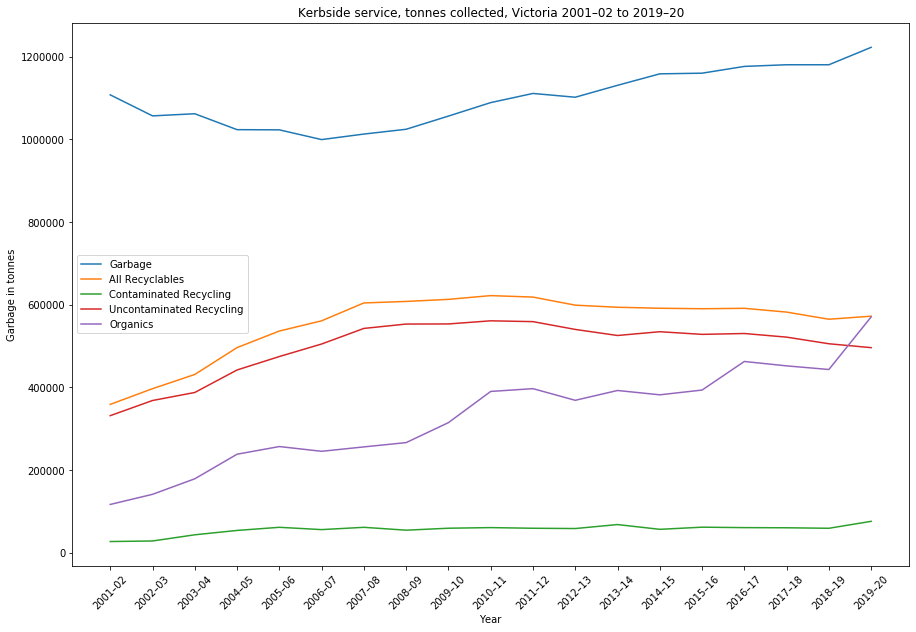

In [27]:
# plot figure year for feature Reporting_Date
plt.figure(figsize=(15,10))
plt.plot(all_trash_overtime_df['Year'], all_trash_overtime_df['Garbage'], label='Garbage')
plt.plot(all_trash_overtime_df['Year'], all_trash_overtime_df['Recyclables'],  label='All Recyclables')
plt.plot(all_trash_overtime_df['Year'], all_trash_overtime_df['Contaminated_recycling'],  label='Contaminated Recycling')
plt.plot(all_trash_overtime_df['Year'], all_trash_overtime_df['Uncontaminated_recycling'],  label='Uncontaminated Recycling')
plt.plot(all_trash_overtime_df['Year'], all_trash_overtime_df['Organics'],  label='Organics')

plt.title('Kerbside service, tonnes collected, Victoria 2001–02 to 2019–20')
plt.xlabel('Year')
plt.ylabel('Garbage in tonnes')
plt.legend()
plt.xticks(rotation=45)
plt.show()